## An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

### Guided Practice:
 1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.


3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

In [6]:
gdp = pd.read_csv('../Data/gdp_per_capita.csv')
gdp.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_dropped = gdp.drop(['Value Footnotes'], axis = 1)
gdp_dropped.head(1)

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266


In [11]:
gdp_dropped[gdp_dropped['Value'].isna()]

,Country or Area,Year,Value


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [14]:
gdp_dropped.shape

(7662, 3)

In [16]:
gdp_dropped.info()
#gdp_dropped.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


7. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_2021`.

In [19]:
gdp_2021 = gdp_dropped[gdp_dropped['Year'] == 2021]
gdp_2021.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
54,Africa Western and Central,2021,4014.607965
87,Albania,2021,14595.944386
120,Algeria,2021,11029.138782


8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [22]:
gdp_countries = gdp_dropped['Country or Area'].value_counts().reset_index()
#gdp_countries.sort_values(by = 'count', ascending = True)
gdp_countries.tail()

,Country or Area,count
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10
241,Djibouti,10


In [24]:
#afghanistan = gdp_countries[gdp_countries['Country or Area'] == 'Afghanistan']
#afghanistan.head()

tenbelow = gdp_countries[gdp_countries['count'] <= 10]
tenbelow.head()

,Country or Area,count
240,Somalia,10
241,Djibouti,10


10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [27]:
describe_2021 = gdp_2021['Value'].describe().reset_index()
describe_2021 = describe_2021.rename(columns={'index':'Index'})
describe_2021

,Index,Value
0,count,241.000000
1,mean,20711.570080
2,std,20916.978968
3,min,714.066712
4,25%,5044.196028
5,50%,13754.802423
6,75%,30974.370692
7,max,115683.493708


11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

array([[<Axes: title={'center': 'Value'}>]], dtype=object)

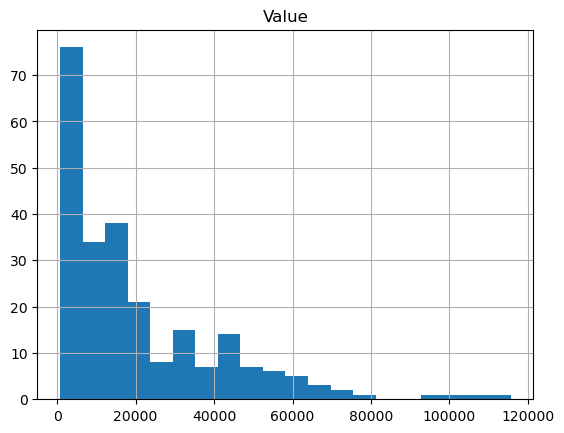

In [30]:
gdp_2021.hist(column='Value',bins = 20)

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [32]:
top_five_gdp_2021 = gdp_2021.nlargest(columns ='Value',n= 5)
top_five_gdp_2021.head()

,Country or Area,Year,Value
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [35]:
bottom_five_gdp_2021 = gdp_2021.nsmallest(columns ='Value',n= 5)
bottom_five_gdp_2021.head()

,Country or Area,Year,Value
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [38]:
gdp_dropped_1990_2021 = gdp_dropped[(gdp_dropped['Year'] == 1990) | (gdp_dropped['Year'] == 2021)]
gdp_dropped_1990_2021.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
52,Africa Eastern and Southern,1990,3037.297466
54,Africa Western and Central,2021,4014.607965
85,Africa Western and Central,1990,2788.301039


In [40]:
gdp_pivoted = pd.pivot_table(gdp_dropped_1990_2021, values='Value', index=['Country or Area'],

                       columns=['Year'], aggfunc="sum")

gdp_pivoted.head()

Year,1990,2021
Country or Area,,
Afghanistan,NaN,1517.016266
Africa Eastern and Southern,3037.297466,3519.174840
Africa Western and Central,2788.301039,4014.607965
Albania,4827.027705,14595.944386
Algeria,8828.874473,11029.138782


In [42]:
gdp_pivoted.index.name

'Country or Area'

In [44]:
null_list = gdp_pivoted.isna()
null_list = null_list[(null_list[1990] == True) | (null_list[2021] == True)]
null_list = null_list.index.to_list()

In [50]:
# Create a boolean mask for countries that are not in null_list
mask = ~gdp_pivoted.index.isin(null_list)

# Filter the DataFrame using the mask
filtered_gdp_pivoted = gdp_pivoted[mask]
filtered_gdp_pivoted

Year,1990,2021
Country or Area,,
Africa Eastern and Southern,3037.297466,3519.174840
Africa Western and Central,2788.301039,4014.607965
Albania,4827.027705,14595.944386
Algeria,8828.874473,11029.138782
Angola,5793.084512,5911.835657
...,...,...
Vanuatu,2774.138350,2800.493866
Viet Nam,2099.394649,10628.219166
World,9705.981267,17055.357429


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [54]:
filtered_gdp_pivoted['Percent_Change'] = ((filtered_gdp_pivoted[2021] - filtered_gdp_pivoted[1990])/filtered_gdp_pivoted[1990])*100
filtered_gdp_pivoted.head()

C:\Users\jdavis\AppData\Local\Temp\ipykernel_9892\3210719796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gdp_pivoted['Percent_Change'] = ((filtered_gdp_pivoted[2021] - filtered_gdp_pivoted[1990])/filtered_gdp_pivoted[1990])*100


Year,1990,2021,Percent_Change
Country or Area,,,
Africa Eastern and Southern,3037.297466,3519.174840,15.865334
Africa Western and Central,2788.301039,4014.607965,43.980435
Albania,4827.027705,14595.944386,202.379544
Algeria,8828.874473,11029.138782,24.921232
Angola,5793.084512,5911.835657,2.049878


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [72]:
negative_growth = filtered_gdp_pivoted[filtered_gdp_pivoted['Percent_Change'] <0]
negative_growth.sort_values(by = 'Percent_Change')

Year,1990,2021,Percent_Change
Country or Area,,,
Burundi,1175.155086,714.066712,-39.236385
Dem. Rep. Congo,1750.169739,1073.643271,-38.654906
Congo,5007.319245,3234.392972,-35.406695
United Arab Emirates,105893.626059,69733.793774,-34.147317
Central African Republic,1200.613390,837.504686,-30.243599
Zimbabwe,2704.757299,2115.144555,-21.799100
Gabon,17559.006114,13814.495200,-21.325301
Ukraine,16428.480470,12949.326170,-21.177578
Haiti,3612.815105,2881.176575,-20.251203


16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

**Bonus:** Put both line charts on the same plot. 

In [100]:
first_percent_change = filtered_gdp_pivoted.nlargest(1, 'Percent_Change')
first_percent_change

Year,1990,2021,Percent_Change
Country or Area,,,
Equatorial Guinea,936.419751,14637.00735,1463.08187


In [102]:
second_percent_change = filtered_gdp_pivoted.nlargest(2, 'Percent_Change')
second_percent_change

Year,1990,2021,Percent_Change
Country or Area,,,
Equatorial Guinea,936.419751,14637.007350,1463.081870
China,1423.896348,17657.495181,1140.082904


In [135]:
eqg_china = gdp_dropped[(gdp_dropped['Country or Area'] == 'Equatorial Guinea') | (gdp_dropped['Country or Area'] == 'China')]
eqg_china = eqg_china.reset_index()
eqg_china

,index,Country or Area,Year,Value
0,1347,China,2022,18187.978737
1,1348,China,2021,17657.495181
2,1349,China,2020,16296.609379
3,1350,China,2019,15977.763828
4,1351,China,2018,15133.995618
...,...,...,...,...
61,2029,Equatorial Guinea,1994,1394.786465
62,2030,Equatorial Guinea,1993,1240.908573
63,2031,Equatorial Guinea,1992,1159.738622
64,2032,Equatorial Guinea,1991,893.097341


In [137]:
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='Value'>

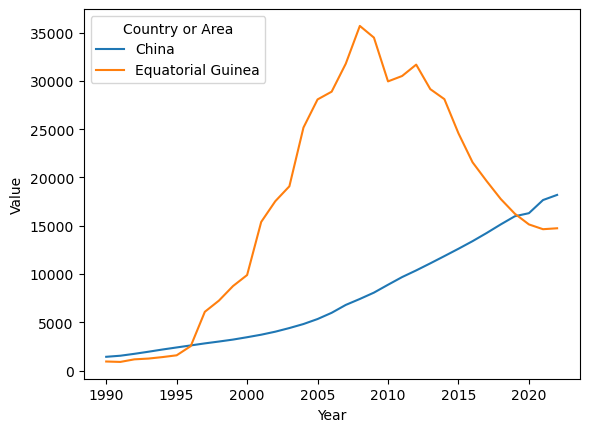

In [147]:
sns.lineplot(x = 'Year', y = 'Value', data = eqg_china, hue = 'Country or Area')

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

19. Determine the number of countries per continent. Create a bar chart showing this.

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.

22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

23. What was the first country with a life expectancy to exceed 80?

24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

### Bonus: Solo Exploration:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 
2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).